In [42]:
import pandas as pd
import json
from warnings import filterwarnings as _fw_
import matplotlib.pyplot as plt
from random import randint
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import seaborn as sns

_fw_('ignore')

In [43]:
df = pd.read_csv('df.csv', encoding='utf-8').drop(columns='Unnamed: 0')
# df

In [44]:
df.head(5)

,RESPONSE_ID,TIME_STARTED,DATE_SUBMITTED,SALES_CHANNEL,__BLOGGER1,__BLOGGER2,TARGET Сменить работу в своей сфере деятельности,TARGET Сменить работу и сферу деятельности,TARGET Увеличить уровень зарплаты,TARGET Найти подработку,...,PROFESSION Простота трудоустройства,PROFESSION Другое,__PROFESSION Другое_4,OTHER_UNIVERSITIES,__OTHER_UNIVERSITY_NAMES,_IS_SKYPRO_BENEFITS,__SKYPRO_BENEFITS,SEX,_AGE,_EARNINGS
0,4,2022-02-16 16:05:35,2022-02-16 16:07:15,От блогера на YouTube (укажите имя блогера),NaN,NaN,0,0,0,0,...,0,0,NaN,0,NaN,Определенно есть,NaN,1,23.0,100 001 – 150 000 рублей
1,5,2022-02-16 16:18:37,2022-02-16 16:20:26,От коллег на работе,NaN,NaN,0,1,0,0,...,0,0,NaN,0,NaN,Скорее нет,NaN,1,23.0,50 001 – 70 000 рублей
2,7,2022-02-16 16:24:22,2022-02-16 16:29:50,"От знакомых, друзей",NaN,NaN,0,0,1,0,...,1,0,NaN,0,NaN,Скорее есть,NaN,1,23.0,30 001 – 40 000 рублей
3,10,2022-02-16 18:28:47,2022-02-16 18:31:38,Через поиск в Google / Яндекс / другой поисков...,NaN,NaN,0,0,0,0,...,0,0,NaN,0,NaN,NaN,NaN,0,31.0,70 001 – 100 000 рублей
4,11,2022-02-16 18:34:18,2022-02-16 18:39:56,От блогера на YouTube (укажите имя блогера),NaN,NaN,0,1,0,0,...,1,0,NaN,0,NaN,NaN,NaN,1,32.0,Предпочитаю не отвечать


In [45]:
print(df['SCHOOL_HEAD5 Цена ниже, чем у других компаний'].sum())
print(df['SCHOOL_TAIL5 Цена ниже, чем у других компаний'].sum())
df[['SCHOOL_HEAD5 Цена ниже, чем у других компаний', 'SCHOOL_TAIL5 Цена ниже, чем у других компаний']].head(20)

1271
2684


,"SCHOOL_HEAD5 Цена ниже, чем у других компаний","SCHOOL_TAIL5 Цена ниже, чем у других компаний"
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [46]:
df.columns

Index(['RESPONSE_ID', 'TIME_STARTED', 'DATE_SUBMITTED', 'SALES_CHANNEL',
       '__BLOGGER1', '__BLOGGER2',
       'TARGET Сменить работу в своей сфере деятельности',
       'TARGET Сменить работу и сферу деятельности',
       'TARGET Увеличить уровень зарплаты', 'TARGET Найти подработку',
       'TARGET Устроиться на первую работу, стартовать карьеру',
       'TARGET Углубить имеющиеся навыки для текущей работы',
       'TARGET Для саморазвития', 'TARGET Перейти на удаленную работу',
       'TARGET Подтянуть навыки для текущей работы',
       'TARGET Освоить навыки для применения в своем бизнесе',
       'TARGET В качестве запасного варианта работы, подстраховки на будущее',
       'TARGET Расширить кругозор без цели смены работы',
       'TARGET В качестве хобби, увлечения', 'TARGET Другое',
       '__TARGET Другое_1', '_TARGET А какая из этих целей обучения основная?',
       'SCHOOL_HEAD5 Цена ниже, чем у других компаний',
       'SCHOOL_HEAD5 Доверие бренду',
       'SCHOOL_HEAD5 

# Анализ выборки

In [47]:
print(df['TIME_STARTED'].min())
print(df['TIME_STARTED'].max())

df['TIME_STARTED'] = pd.to_datetime(df['TIME_STARTED'])
df['month_started'] = df['TIME_STARTED'].dt.month

2022-02-16 16:05:35
2022-11-09 06:32:41


In [48]:
dfan = df[~df['month_started'].isin([11])]

### TARGET

In [49]:
df_gr_target = dfan.groupby('month_started').agg({  'RESPONSE_ID':'count'
                                 , 'TARGET Сменить работу в своей сфере деятельности':'sum'
                                 , 'TARGET Сменить работу и сферу деятельности':'sum'
                                 , 'TARGET Увеличить уровень зарплаты':'sum'
                                 , 'TARGET Найти подработку':'sum'
                                 , 'TARGET Устроиться на первую работу, стартовать карьеру':'sum'
                                 , 'TARGET Углубить имеющиеся навыки для текущей работы':'sum'
                                 , 'TARGET Для саморазвития':'sum'
                                 , 'TARGET Перейти на удаленную работу':'sum'
                                 , 'TARGET Подтянуть навыки для текущей работы':'sum'
                                 , 'TARGET Освоить навыки для применения в своем бизнесе':'sum'
                                 , 'TARGET В качестве запасного варианта работы, подстраховки на будущее':'sum'
                                 , 'TARGET Расширить кругозор без цели смены работы':'sum'
                                 , 'TARGET В качестве хобби, увлечения':'sum'
                                }).reset_index()

col_num = len(df_gr_target.columns)-2
print(col_num)

13


In [50]:
for i in df_gr_target.columns[2:]:
    df_gr_target['ratio '+i ] = df_gr_target[i] / df_gr_target['RESPONSE_ID']

In [51]:
df_gr_target

,month_started,RESPONSE_ID,TARGET Сменить работу в своей сфере деятельности,TARGET Сменить работу и сферу деятельности,TARGET Увеличить уровень зарплаты,TARGET Найти подработку,"TARGET Устроиться на первую работу, стартовать карьеру",TARGET Углубить имеющиеся навыки для текущей работы,TARGET Для саморазвития,TARGET Перейти на удаленную работу,...,ratio TARGET Найти подработку,"ratio TARGET Устроиться на первую работу, стартовать карьеру",ratio TARGET Углубить имеющиеся навыки для текущей работы,ratio TARGET Для саморазвития,ratio TARGET Перейти на удаленную работу,ratio TARGET Подтянуть навыки для текущей работы,ratio TARGET Освоить навыки для применения в своем бизнесе,"ratio TARGET В качестве запасного варианта работы, подстраховки на будущее",ratio TARGET Расширить кругозор без цели смены работы,"ratio TARGET В качестве хобби, увлечения"
0,2,963,171,453,377,201,144,74,342,476,...,0.208723,0.149533,0.076843,0.355140,0.494289,0.087227,0.091381,0.218069,0.080997,0.100727
1,3,2007,393,1061,677,353,310,123,651,934,...,0.175884,0.154459,0.061286,0.324365,0.465371,0.059292,0.074738,0.251619,0.070254,0.088690
2,4,1461,279,700,500,264,242,93,458,630,...,0.180698,0.165640,0.063655,0.313484,0.431211,0.069815,0.075975,0.241615,0.069131,0.091718
3,5,1507,282,768,530,267,295,99,554,630,...,0.177173,0.195753,0.065693,0.367618,0.418049,0.054413,0.081619,0.214333,0.089582,0.102853
4,6,1261,207,582,374,234,272,89,455,483,...,0.185567,0.215702,0.070579,0.360825,0.383029,0.071372,0.087232,0.180809,0.071372,0.118160
5,7,1033,172,498,368,203,187,79,340,464,...,0.196515,0.181026,0.076476,0.329138,0.449177,0.066796,0.090029,0.216844,0.092933,0.109390
6,8,176,40,94,76,31,21,15,60,83,...,0.176136,0.119318,0.085227,0.340909,0.471591,0.079545,0.085227,0.181818,0.045455,0.056818
7,9,427,85,206,144,77,95,23,132,200,...,0.180328,0.222482,0.053864,0.309133,0.468384,0.046838,0.077283,0.194379,0.051522,0.096019
8,10,884,166,427,290,138,164,50,279,392,...,0.156109,0.185520,0.056561,0.315611,0.443439,0.062217,0.084842,0.179864,0.064480,0.083710


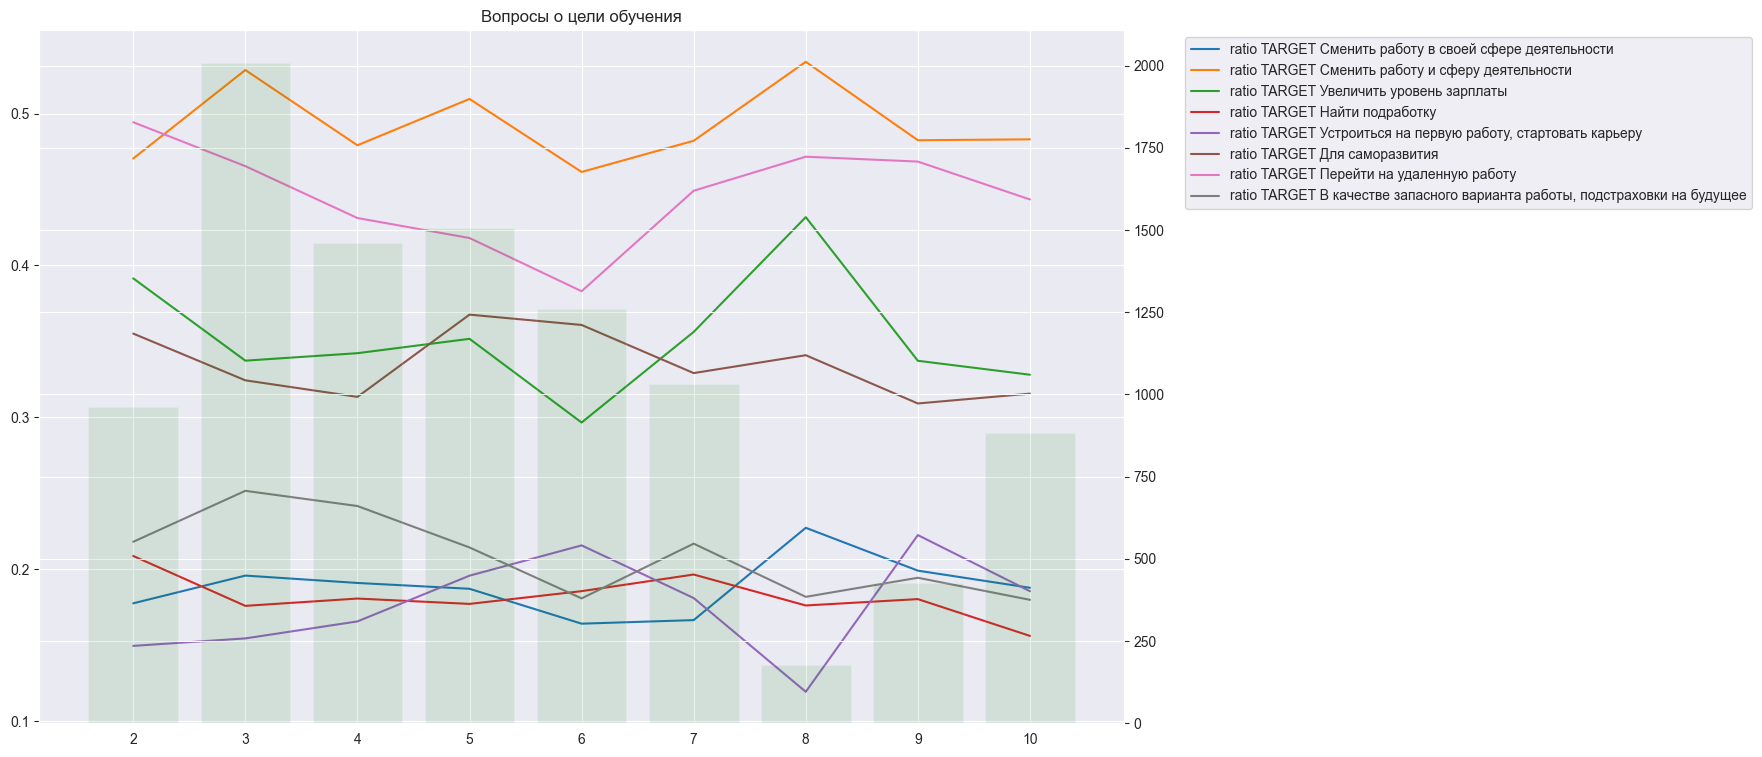

In [52]:
fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(111)
ax2 = ax.twinx()

for i in df_gr_target.columns[15:]:
    avg = df_gr_target[i].mean()
    if avg > .1:
        ax.plot(df_gr_target['month_started'], df_gr_target[i], label = i)
        
ax2.bar(df_gr_target['month_started'], df_gr_target['RESPONSE_ID'], alpha = .1, color = 'green')
ax.legend(bbox_to_anchor=(1.05, 1))
plt.xticks(df_gr_target['month_started'])
plt.title('Вопросы о цели обучения')
plt.show()

### PROFESSION

In [53]:
df_gr_prof = dfan.groupby('month_started').agg({  'RESPONSE_ID':'count'
                                 , 'PROFESSION Востребованность профессии':'sum'
                                 , 'PROFESSION Более высокая зарплата в этой профессии':'sum'
                                 , 'PROFESSION Более интересный род занятий в работе':'sum'
                                 , 'PROFESSION Перспективы карьерного роста':'sum'
                                 , 'PROFESSION Наличие определенных знаний до обучения':'sum'
                                 , 'PROFESSION Возможность применять знания в текущей работе':'sum'
                                 , 'PROFESSION Возможность работать удаленно':'sum'
                                 , 'PROFESSION Возможность работать в IT-сфере':'sum'
                                 , 'PROFESSION Простота трудоустройства':'sum'
                                 , 'PROFESSION Другое':'sum'
                                }).reset_index()

col_num = len(df_gr_prof.columns)-2
print(col_num)

10


In [54]:
for i in df_gr_prof.columns[2:]:
    df_gr_prof['ratio '+i ] = df_gr_prof[i] / df_gr_prof['RESPONSE_ID']

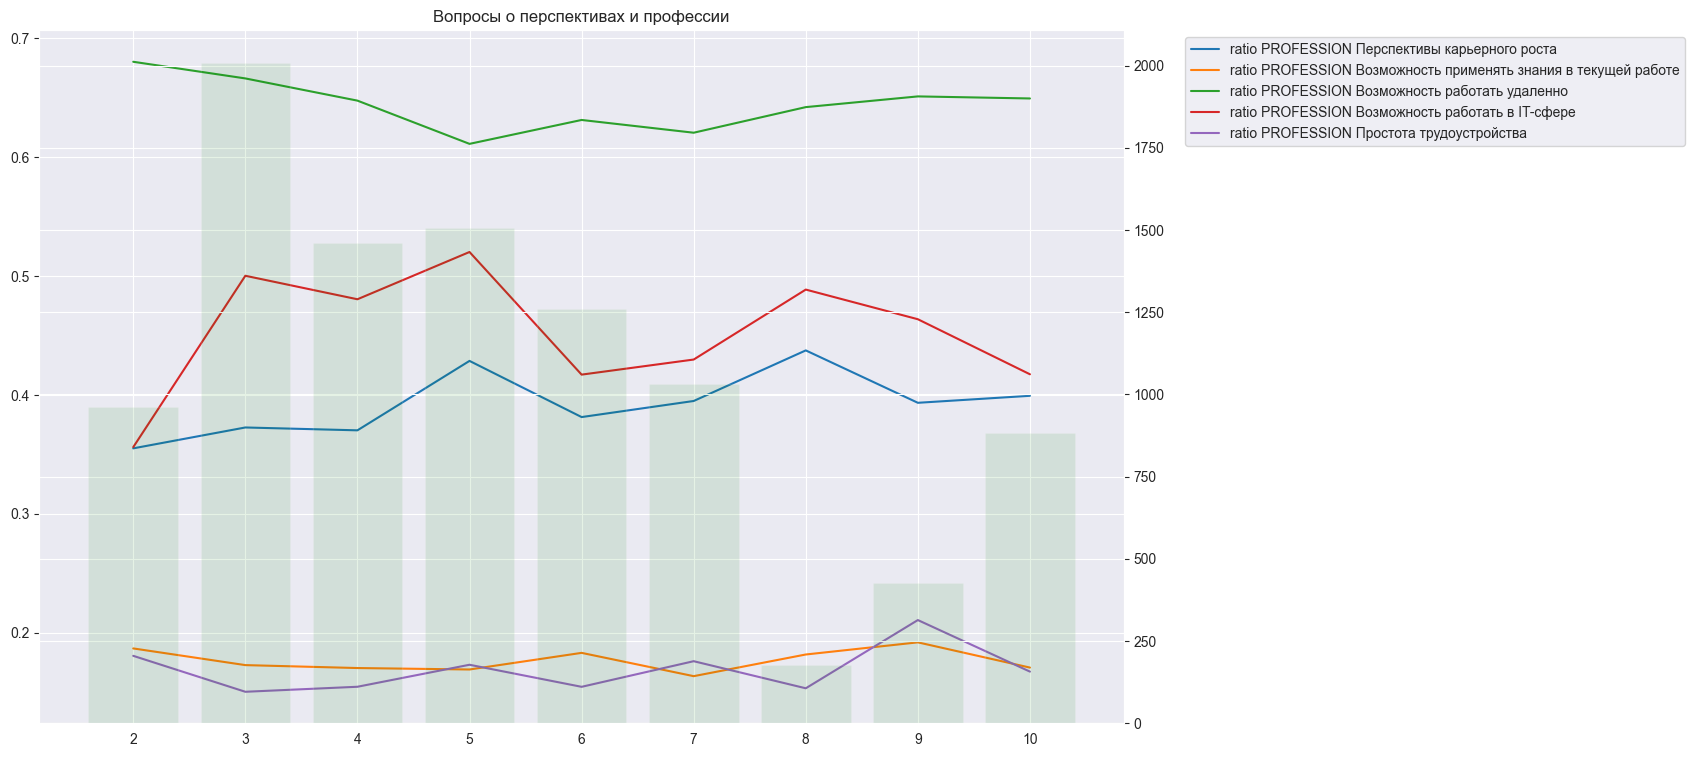

In [55]:
fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(111)
ax2 = ax.twinx()

for i in df_gr_prof.columns[15:]:
    avg = df_gr_prof[i].mean()
    if avg > .1:
        ax.plot(df_gr_prof['month_started'], df_gr_prof[i], label = i)
        
ax2.bar(df_gr_prof['month_started'], df_gr_prof['RESPONSE_ID'], alpha = .1, color = 'green')
ax.legend(bbox_to_anchor=(1.05, 1))
plt.xticks(df_gr_prof['month_started'])
plt.title('Вопросы о перспективах и профессии')
plt.show()

### COURSE

In [56]:
df_gr_course = dfan.groupby('month_started').agg({  'RESPONSE_ID':'count'
                                 , 'COURSE Аналитик данных':'sum'
                                 , 'COURSE Инженер по тестированию':'sum'
                                 , 'COURSE Python-разработчик':'sum'
                                 , 'COURSE Java-разработчик':'sum'
                                 , 'COURSE Android-разработчик':'sum'
                                 , 'COURSE Frontend-разработчик':'sum'
                                 , 'COURSE Маркетинг':'sum'
                                 , 'COURSE Веб-дизайн':'sum'
                                 , 'COURSE Другие':'sum'
                                 , 'COURSE Затрудняюсь ответить':'sum'
                                }).reset_index()

col_num = len(df_gr_course.columns)-2
print(col_num)

10


In [57]:
for i in df_gr_course.columns[2:]:
    df_gr_course['ratio '+i ] = df_gr_course[i] / df_gr_course['RESPONSE_ID']

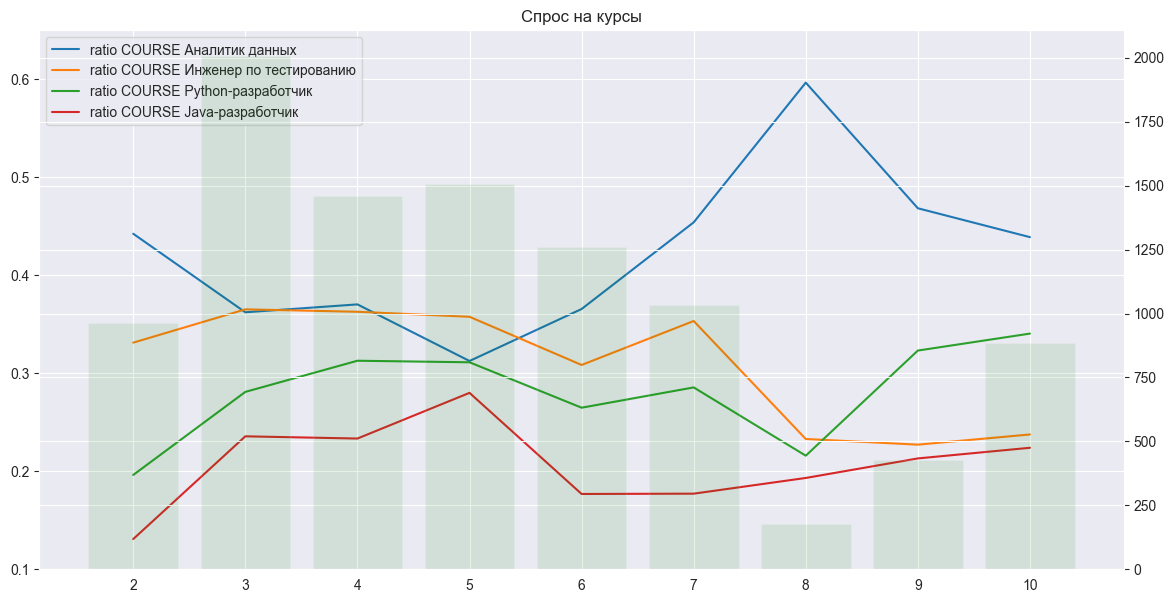

In [58]:
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
plt.title("Спрос на курсы")

for i in df_gr_course.columns[12:16]:
    ax.plot(df_gr_course['month_started'], df_gr_course[i], label = i)
    
ax.set_ylim([.1,.65])
ax2.bar(df_gr_course['month_started'], df_gr_course['RESPONSE_ID'], alpha = .1, color = 'green')
ax.legend(loc = 'upper left')
plt.xticks(df_gr_course['month_started'])
plt.show()


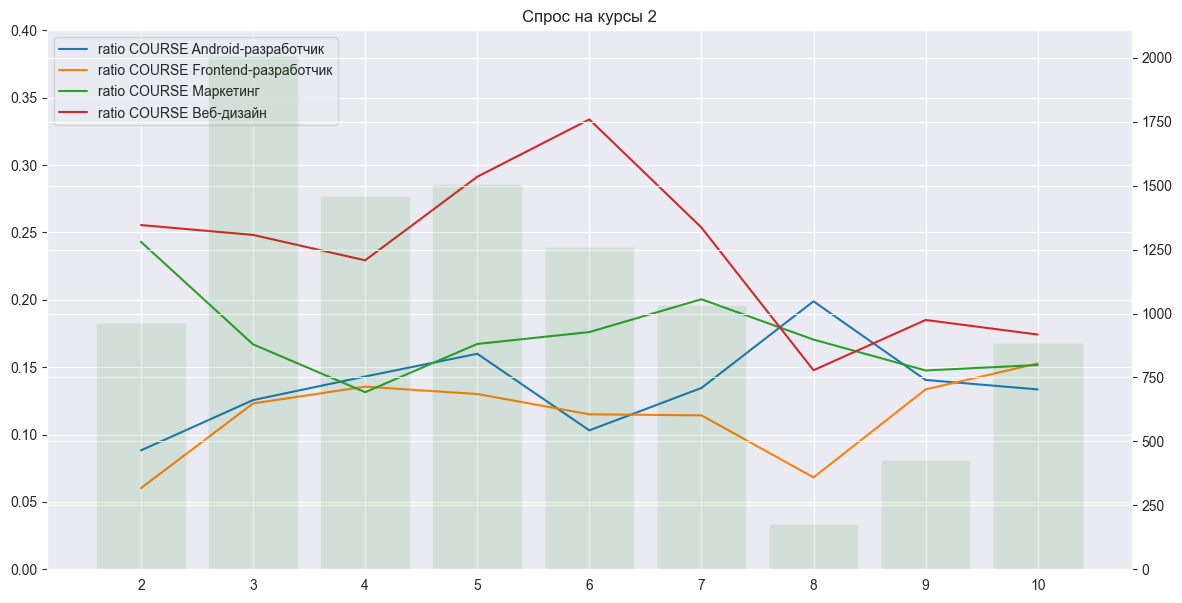

In [59]:
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
plt.title("Спрос на курсы 2")

for i in df_gr_course.columns[16:20]:
    ax.plot(df_gr_course['month_started'], df_gr_course[i], label = i)
    
ax.set_ylim([0,.4])
ax2.bar(df_gr_course['month_started'], df_gr_course['RESPONSE_ID'], alpha = .1, color = 'green')
ax.legend(loc = 'upper left')
plt.xticks(df_gr_course['month_started'])
plt.show()


In [60]:
dfan.groupby('month_started').mean()['_AGE'].reset_index()

,month_started,_AGE
0,2,32.495298
1,3,32.158000
2,4,32.362010
3,5,29.522088
4,6,29.602236
5,7,29.980526
6,8,31.414773
7,9,31.042553
8,10,31.186788


# Кластеризация

In [61]:
with open('binary_columns.json', 'r', encoding='utf-8') as file:
    binary_columns = json.load(file)
# binary_columns[:-2]

In [62]:
target = binary_columns[0:13]
school_head5 = binary_columns[14:30]
school_tail5 = binary_columns[31:46]
course = binary_columns[47:56]
profession = binary_columns[57:66]

In [63]:
school_head5

['SCHOOL_HEAD5 Цена ниже, чем у других компаний',
 'SCHOOL_HEAD5 Доверие бренду',
 'SCHOOL_HEAD5 Положительные отзывы в интернете',
 'SCHOOL_HEAD5 Выдача диплома о профессиональной переподготовке',
 'SCHOOL_HEAD5 Возможность учиться в любое удобное время',
 'SCHOOL_HEAD5 Помощь в трудоустройстве',
 'SCHOOL_HEAD5 Наличие в программе нужных мне тем',
 'SCHOOL_HEAD5 Помощь в выборе подходящей профессии',
 'SCHOOL_HEAD5 Рекомендации друзей, знакомых',
 'SCHOOL_HEAD5 Карьерный опыт преподавателей',
 'SCHOOL_HEAD5 Возможность оформить рассрочку при покупке',
 'SCHOOL_HEAD5 Оперативные ответы на ваши вопросы в ходе обучения',
 'SCHOOL_HEAD5 Возможность живого общения с наставником',
 'SCHOOL_HEAD5 Отсутствие установленных сроков сдачи работ',
 'SCHOOL_HEAD5 Истории успеха выпускников',
 'SCHOOL_HEAD5 Кейсы из практики для портфолио']

In [64]:
target

['TARGET Сменить работу в своей сфере деятельности',
 'TARGET Сменить работу и сферу деятельности',
 'TARGET Увеличить уровень зарплаты',
 'TARGET Найти подработку',
 'TARGET Устроиться на первую работу, стартовать карьеру',
 'TARGET Углубить имеющиеся навыки для текущей работы',
 'TARGET Для саморазвития',
 'TARGET Перейти на удаленную работу',
 'TARGET Подтянуть навыки для текущей работы',
 'TARGET Освоить навыки для применения в своем бизнесе',
 'TARGET В качестве запасного варианта работы, подстраховки на будущее',
 'TARGET Расширить кругозор без цели смены работы',
 'TARGET В качестве хобби, увлечения']

# КЛАСТЕРНЫЙ АНАЛИЗ МЕТОДОМ K-MEANS

In [65]:
df_K = df[binary_columns[:-2]]

In [66]:
model = KMeans(n_clusters=4, random_state=42, n_init=50, verbose=1, tol=1e-05)
model.fit(df_K)

Initialization complete
Iteration 0, inertia 164710.0.
Iteration 1, inertia 95064.56614403136.
Iteration 2, inertia 94107.1073105509.
Iteration 3, inertia 93631.7457222458.
Iteration 4, inertia 93413.6145881998.
Iteration 5, inertia 93326.06539936597.
Iteration 6, inertia 93283.17255088178.
Iteration 7, inertia 93263.33259690466.
Iteration 8, inertia 93248.69364522184.
Iteration 9, inertia 93231.73650060366.
Iteration 10, inertia 93210.02550160978.
Iteration 11, inertia 93183.82209363651.
Iteration 12, inertia 93149.4577436703.
Iteration 13, inertia 93113.88666881427.
Iteration 14, inertia 93087.53809127166.
Iteration 15, inertia 93069.54189755868.
Iteration 16, inertia 93057.13225083413.
Iteration 17, inertia 93050.58795333585.
Iteration 18, inertia 93046.32367334052.
Iteration 19, inertia 93043.61865058029.
Iteration 20, inertia 93041.95301961084.
Iteration 21, inertia 93040.59602559276.
Iteration 22, inertia 93039.35599514203.
Iteration 23, inertia 93038.48053649245.
Iteration 24, i

KMeans(n_clusters=4, n_init=50, random_state=42, tol=1e-05, verbose=1)

In [67]:
# пробуем обучать ml-модельку
new_respondents = [[randint(0, 1) for _ in range(67)] for __ in range(10)]
model.predict(new_respondents)

array([2, 2, 0, 2, 2, 2, 2, 0, 2, 2])

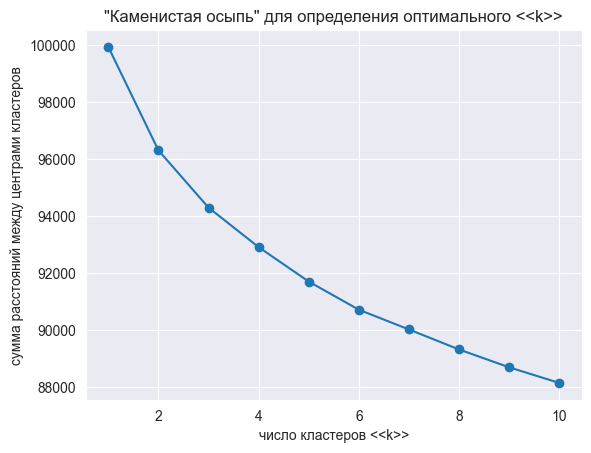

In [68]:
K = range(1, 11)
models = [KMeans(n_clusters=k, random_state=42, n_init=50, verbose=0, tol=1e-05).fit(df_K) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('число кластеров <<k>>')
plt.ylabel('сумма расстояний между центрами кластеров')
plt.title('"Каменистая осыпь" для определения оптимального <<k>>')
plt.show()

In [69]:
model = KMeans(n_clusters=4, random_state=42, n_init=50, verbose=1, tol=1e-05)
model.fit(df_K)
df_K['cluster_k'] = model.labels_
df_K.groupby('cluster_k').mean()

Initialization complete
Iteration 0, inertia 164710.0.
Iteration 1, inertia 95064.56614403136.
Iteration 2, inertia 94107.1073105509.
Iteration 3, inertia 93631.7457222458.
Iteration 4, inertia 93413.6145881998.
Iteration 5, inertia 93326.06539936597.
Iteration 6, inertia 93283.17255088178.
Iteration 7, inertia 93263.33259690466.
Iteration 8, inertia 93248.69364522184.
Iteration 9, inertia 93231.73650060366.
Iteration 10, inertia 93210.02550160978.
Iteration 11, inertia 93183.82209363653.
Iteration 12, inertia 93149.4577436703.
Iteration 13, inertia 93113.88666881427.
Iteration 14, inertia 93087.53809127166.
Iteration 15, inertia 93069.54189755868.
Iteration 16, inertia 93057.13225083413.
Iteration 17, inertia 93050.58795333585.
Iteration 18, inertia 93046.32367334052.
Iteration 19, inertia 93043.61865058029.
Iteration 20, inertia 93041.95301961084.
Iteration 21, inertia 93040.59602559276.
Iteration 22, inertia 93039.35599514203.
Iteration 23, inertia 93038.48053649245.
Iteration 24, i

,TARGET Сменить работу в своей сфере деятельности,TARGET Сменить работу и сферу деятельности,TARGET Увеличить уровень зарплаты,TARGET Найти подработку,"TARGET Устроиться на первую работу, стартовать карьеру",TARGET Углубить имеющиеся навыки для текущей работы,TARGET Для саморазвития,TARGET Перейти на удаленную работу,TARGET Подтянуть навыки для текущей работы,TARGET Освоить навыки для применения в своем бизнесе,...,PROFESSION Востребованность профессии,PROFESSION Более высокая зарплата в этой профессии,PROFESSION Более интересный род занятий в работе,PROFESSION Перспективы карьерного роста,PROFESSION Наличие определенных знаний до обучения,PROFESSION Возможность применять знания в текущей работе,PROFESSION Возможность работать удаленно,PROFESSION Возможность работать в IT-сфере,PROFESSION Простота трудоустройства,PROFESSION Другое
cluster_k,,,,,,,,,,,,,,,,,,,,,
0,0.277778,0.658333,0.888095,0.296429,0.187698,0.078968,0.569444,0.800000,0.077381,0.106746,...,0.677778,0.671032,0.263889,0.454762,0.070238,0.141270,0.761111,0.423810,0.192460,0.005556
1,0.112516,0.611219,0.050908,0.108625,0.169909,0.014916,0.114786,0.353761,0.012970,0.021077,...,0.732166,0.450389,0.250324,0.399481,0.060636,0.085927,0.736381,0.483463,0.169261,0.004864
2,0.215877,0.545961,0.401114,0.232591,0.268802,0.077298,0.467270,0.502786,0.068245,0.114206,...,0.623955,0.548050,0.295961,0.462396,0.098886,0.203343,0.642758,0.700557,0.191504,0.008357
3,0.164031,0.175064,0.140125,0.134241,0.130195,0.107025,0.302317,0.175800,0.113277,0.111438,...,0.344612,0.260758,0.254873,0.271423,0.127253,0.290916,0.430673,0.332107,0.123575,0.031629


Initialization complete
Iteration 0, inertia 164710.0.
Iteration 1, inertia 95064.56614403136.
Iteration 2, inertia 94107.1073105509.
Iteration 3, inertia 93631.7457222458.
Iteration 4, inertia 93413.6145881998.
Iteration 5, inertia 93326.06539936597.
Iteration 6, inertia 93283.17255088178.
Iteration 7, inertia 93263.33259690466.
Iteration 8, inertia 93248.69364522184.
Iteration 9, inertia 93231.73650060366.
Iteration 10, inertia 93210.02550160978.
Iteration 11, inertia 93183.82209363651.
Iteration 12, inertia 93149.4577436703.
Iteration 13, inertia 93113.88666881427.
Iteration 14, inertia 93087.53809127166.
Iteration 15, inertia 93069.54189755868.
Iteration 16, inertia 93057.13225083413.
Iteration 17, inertia 93050.58795333585.
Iteration 18, inertia 93046.32367334052.
Iteration 19, inertia 93043.61865058029.
Iteration 20, inertia 93041.95301961084.
Iteration 21, inertia 93040.59602559276.
Iteration 22, inertia 93039.35599514203.
Iteration 23, inertia 93038.48053649245.
Iteration 24, i

,TARGET Сменить работу в своей сфере деятельности,TARGET Сменить работу и сферу деятельности,TARGET Увеличить уровень зарплаты,TARGET Найти подработку,"TARGET Устроиться на первую работу, стартовать карьеру",TARGET Углубить имеющиеся навыки для текущей работы,TARGET Для саморазвития,TARGET Перейти на удаленную работу,TARGET Подтянуть навыки для текущей работы,TARGET Освоить навыки для применения в своем бизнесе,...,PROFESSION Востребованность профессии,PROFESSION Более высокая зарплата в этой профессии,PROFESSION Более интересный род занятий в работе,PROFESSION Перспективы карьерного роста,PROFESSION Наличие определенных знаний до обучения,PROFESSION Возможность применять знания в текущей работе,PROFESSION Возможность работать удаленно,PROFESSION Возможность работать в IT-сфере,PROFESSION Простота трудоустройства,PROFESSION Другое
cluster_k,,,,,,,,,,,,,,,,,,,,,
0,0.277778,0.658333,0.888095,0.296429,0.187698,0.078968,0.569444,0.800000,0.077381,0.106746,...,0.677778,0.671032,0.263889,0.454762,0.070238,0.141270,0.761111,0.423810,0.192460,0.005556
1,0.112516,0.611219,0.050908,0.108625,0.169909,0.014916,0.114786,0.353761,0.012970,0.021077,...,0.732166,0.450389,0.250324,0.399481,0.060636,0.085927,0.736381,0.483463,0.169261,0.004864
2,0.215877,0.545961,0.401114,0.232591,0.268802,0.077298,0.467270,0.502786,0.068245,0.114206,...,0.623955,0.548050,0.295961,0.462396,0.098886,0.203343,0.642758,0.700557,0.191504,0.008357
3,0.164031,0.175064,0.140125,0.134241,0.130195,0.107025,0.302317,0.175800,0.113277,0.111438,...,0.344612,0.260758,0.254873,0.271423,0.127253,0.290916,0.430673,0.332107,0.123575,0.031629


In [70]:
*clusters, = range(0, df_K.cluster_k.nunique())
categories = [target, school_head5, school_tail5, course, profession]
clusters_dictionary = {}
FX = lambda x: df_K.groupby('cluster_k').mean().loc[:, x].idxmax(axis=1)
for i_cluster in clusters:
    clusters_dictionary[i_cluster] = {'target': FX(categories[0])[i_cluster],
                                      'school_head5': FX(categories[1])[i_cluster],
                                      'school_tail5': FX(categories[2])[i_cluster],
                                      'course': FX(categories[3])[i_cluster],
                                      'profession': FX(categories[4])[i_cluster]}
clusters_dictionary

{0: {'target': 'TARGET Увеличить уровень зарплаты',
  'school_head5': 'SCHOOL_HEAD5 Помощь в трудоустройстве',
  'school_tail5': 'SCHOOL_TAIL5 Отсутствие установленных сроков сдачи работ',
  'course': 'COURSE Аналитик данных',
  'profession': 'PROFESSION Возможность работать удаленно'},
 1: {'target': 'TARGET Сменить работу и сферу деятельности',
  'school_head5': 'SCHOOL_HEAD5 Помощь в трудоустройстве',
  'school_tail5': 'SCHOOL_TAIL5 Отсутствие установленных сроков сдачи работ',
  'course': 'COURSE Инженер по тестированию',
  'profession': 'PROFESSION Возможность работать удаленно'},
 2: {'target': 'TARGET Сменить работу и сферу деятельности',
  'school_head5': 'SCHOOL_HEAD5 Возможность учиться в любое удобное время',
  'school_tail5': 'SCHOOL_TAIL5 Истории успеха выпускников',
  'course': 'COURSE Java-разработчик',
  'profession': 'PROFESSION Возможность работать в IT-сфере'},
 3: {'target': 'TARGET Для саморазвития',
  'school_head5': 'SCHOOL_HEAD5 Возможность учиться в любое удобн

{0: {'target': 'TARGET Увеличить уровень зарплаты',
  'school_head5': 'SCHOOL_HEAD5 Помощь в трудоустройстве',
  'school_tail5': 'SCHOOL_TAIL5 Отсутствие установленных сроков сдачи работ',
  'course': 'COURSE Аналитик данных',
  'profession': 'PROFESSION Возможность работать удаленно'},
 1: {'target': 'TARGET Сменить работу и сферу деятельности',
  'school_head5': 'SCHOOL_HEAD5 Помощь в трудоустройстве',
  'school_tail5': 'SCHOOL_TAIL5 Отсутствие установленных сроков сдачи работ',
  'course': 'COURSE Инженер по тестированию',
  'profession': 'PROFESSION Возможность работать удаленно'},
 2: {'target': 'TARGET Сменить работу и сферу деятельности',
  'school_head5': 'SCHOOL_HEAD5 Возможность учиться в любое удобное время',
  'school_tail5': 'SCHOOL_TAIL5 Истории успеха выпускников',
  'course': 'COURSE Java-разработчик',
  'profession': 'PROFESSION Возможность работать в IT-сфере'},
 3: {'target': 'TARGET Для саморазвития',
  'school_head5': 'SCHOOL_HEAD5 Возможность учиться в любое удобн

In [71]:
df_K.groupby('cluster_k').size()


cluster_k
0    2520
1    3084
2    1436
3    2719
dtype: int64

cluster_k
0    2520
1    3084
2    1436
3    2719
dtype: int64

# ИЕРАРХИЧЕСКИЙ КЛАСТЕРНЫЙ АНАЛИЗ

In [72]:
link = linkage(df_K, 'ward', 'euclidean')
# link[:5]

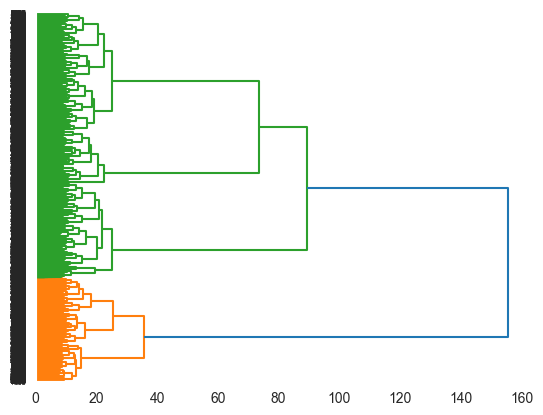

In [32]:
dn = dendrogram(link, orientation='right')  # дендрограмма

In [33]:
df_K.loc[:, 'cluster_h'] = fcluster(link, t=40, criterion='distance')

In [34]:
*clusters, = range(1, df_K.cluster_h.nunique() + 1)
categories = [target, school_head5, school_tail5, course, profession]
clusters_dictionary_H = {}
FX = lambda x: df_K.groupby('cluster_h').mean().loc[:, x].idxmax(axis=1)
for i_cluster in clusters:
    clusters_dictionary_H[i_cluster] = {'target': FX(categories[0])[i_cluster],
                                      'school_head5': FX(categories[1])[i_cluster],
                                      'school_tail5': FX(categories[2])[i_cluster],
                                      'course': FX(categories[3])[i_cluster],
                                      'profession': FX(categories[4])[i_cluster]}
clusters_dictionary_H

{1: {'target': 'TARGET Для саморазвития',
  'school_head5': 'SCHOOL_HEAD5 Возможность учиться в любое удобное время',
  'school_tail5': 'SCHOOL_TAIL5 Помощь в трудоустройстве',
  'course': 'COURSE Аналитик данных',
  'profession': 'PROFESSION Возможность работать удаленно'},
 2: {'target': 'TARGET Увеличить уровень зарплаты',
  'school_head5': 'SCHOOL_HEAD5 Помощь в трудоустройстве',
  'school_tail5': 'SCHOOL_TAIL5 Отсутствие установленных сроков сдачи работ',
  'course': 'COURSE Аналитик данных',
  'profession': 'PROFESSION Возможность работать удаленно'},
 3: {'target': 'TARGET Сменить работу и сферу деятельности',
  'school_head5': 'SCHOOL_HEAD5 Возможность учиться в любое удобное время',
  'school_tail5': 'SCHOOL_TAIL5 Истории успеха выпускников',
  'course': 'COURSE Java-разработчик',
  'profession': 'PROFESSION Возможность работать в IT-сфере'},
 4: {'target': 'TARGET Сменить работу и сферу деятельности',
  'school_head5': 'SCHOOL_HEAD5 Помощь в трудоустройстве',
  'school_tail5'

In [35]:
df_K.groupby('cluster_h').size()

cluster_h
1    2754
2    2507
3    1368
4    3130
dtype: int64

# Соединим результаты

In [36]:
df_res = pd.DataFrame(columns=clusters_dictionary_H[1].keys())

for i in clusters_dictionary_H:
    dict_loc = clusters_dictionary_H[i]
    print(dict_loc['target'])
    
    df_res = df_res.append({'target' : dict_loc['target']
    ,'school_head5':dict_loc['school_head5']
    ,'school_tail5':dict_loc['school_tail5']
    ,'course':dict_loc['course']
    ,'profession':dict_loc['profession']
                           }, ignore_index=True)
    
        
for i in clusters_dictionary:
    dict_loc = clusters_dictionary[i]
    print(dict_loc['target'])
    
    df_res = df_res.append({'target' : dict_loc['target']
    ,'school_head5':dict_loc['school_head5']
    ,'school_tail5':dict_loc['school_tail5']
    ,'course':dict_loc['course']
    ,'profession':dict_loc['profession']
                           }, ignore_index=True)

TARGET Для саморазвития
TARGET Увеличить уровень зарплаты
TARGET Сменить работу и сферу деятельности
TARGET Сменить работу и сферу деятельности
TARGET Увеличить уровень зарплаты
TARGET Сменить работу и сферу деятельности
TARGET Сменить работу и сферу деятельности
TARGET Для саморазвития


In [37]:
#df_res = pd.DataFrame(columns=clusters_dictionary_H[1].keys())
df_res[['target','school_head5','course','profession']]

,target,school_head5,course,profession
0,TARGET Для саморазвития,SCHOOL_HEAD5 Возможность учиться в любое удобн...,COURSE Аналитик данных,PROFESSION Возможность работать удаленно
1,TARGET Увеличить уровень зарплаты,SCHOOL_HEAD5 Помощь в трудоустройстве,COURSE Аналитик данных,PROFESSION Возможность работать удаленно
2,TARGET Сменить работу и сферу деятельности,SCHOOL_HEAD5 Возможность учиться в любое удобн...,COURSE Java-разработчик,PROFESSION Возможность работать в IT-сфере
3,TARGET Сменить работу и сферу деятельности,SCHOOL_HEAD5 Помощь в трудоустройстве,COURSE Инженер по тестированию,PROFESSION Возможность работать удаленно
4,TARGET Увеличить уровень зарплаты,SCHOOL_HEAD5 Помощь в трудоустройстве,COURSE Аналитик данных,PROFESSION Возможность работать удаленно
5,TARGET Сменить работу и сферу деятельности,SCHOOL_HEAD5 Помощь в трудоустройстве,COURSE Инженер по тестированию,PROFESSION Возможность работать удаленно
6,TARGET Сменить работу и сферу деятельности,SCHOOL_HEAD5 Возможность учиться в любое удобн...,COURSE Java-разработчик,PROFESSION Возможность работать в IT-сфере
7,TARGET Для саморазвития,SCHOOL_HEAD5 Возможность учиться в любое удобн...,COURSE Аналитик данных,PROFESSION Возможность работать удаленно


# Мультиколлинеарность

In [38]:
df_K["TARGET ALL"] = (df_K[target].sum(axis=1) / len(target) * 100).apply(int) // 10
df_K["SCHOOL_HEAD5 ALL"] = (df_K[school_head5].sum(axis=1) / len(school_head5) * 100).apply(int) // 10
df_K["SCHOOL_TAIL5 ALL"] = (df_K[school_tail5].sum(axis=1) / len(school_tail5) * 100).apply(int) // 10
df_K["COURSE ALL"] = (df_K[course].sum(axis=1) / len(course) * 100).apply(int) // 10
df_K["PROFESSION ALL"] = (df_K[profession].sum(axis=1) / len(profession) * 100).apply(int) // 10
df_K.filter(regex='ALL')

,TARGET ALL,SCHOOL_HEAD5 ALL,SCHOOL_TAIL5 ALL,COURSE ALL,PROFESSION ALL
0,1,0,0,1,2
1,0,3,2,3,3
2,3,3,3,4,6
3,2,3,2,1,2
4,0,3,3,1,3
...,...,...,...,...,...
9754,2,2,0,2,3
9755,0,3,3,2,5
9756,3,3,2,3,3
9757,3,3,3,2,3


In [39]:
correlation = df_K[binary_columns[:-2]].corr()

<AxesSubplot: >

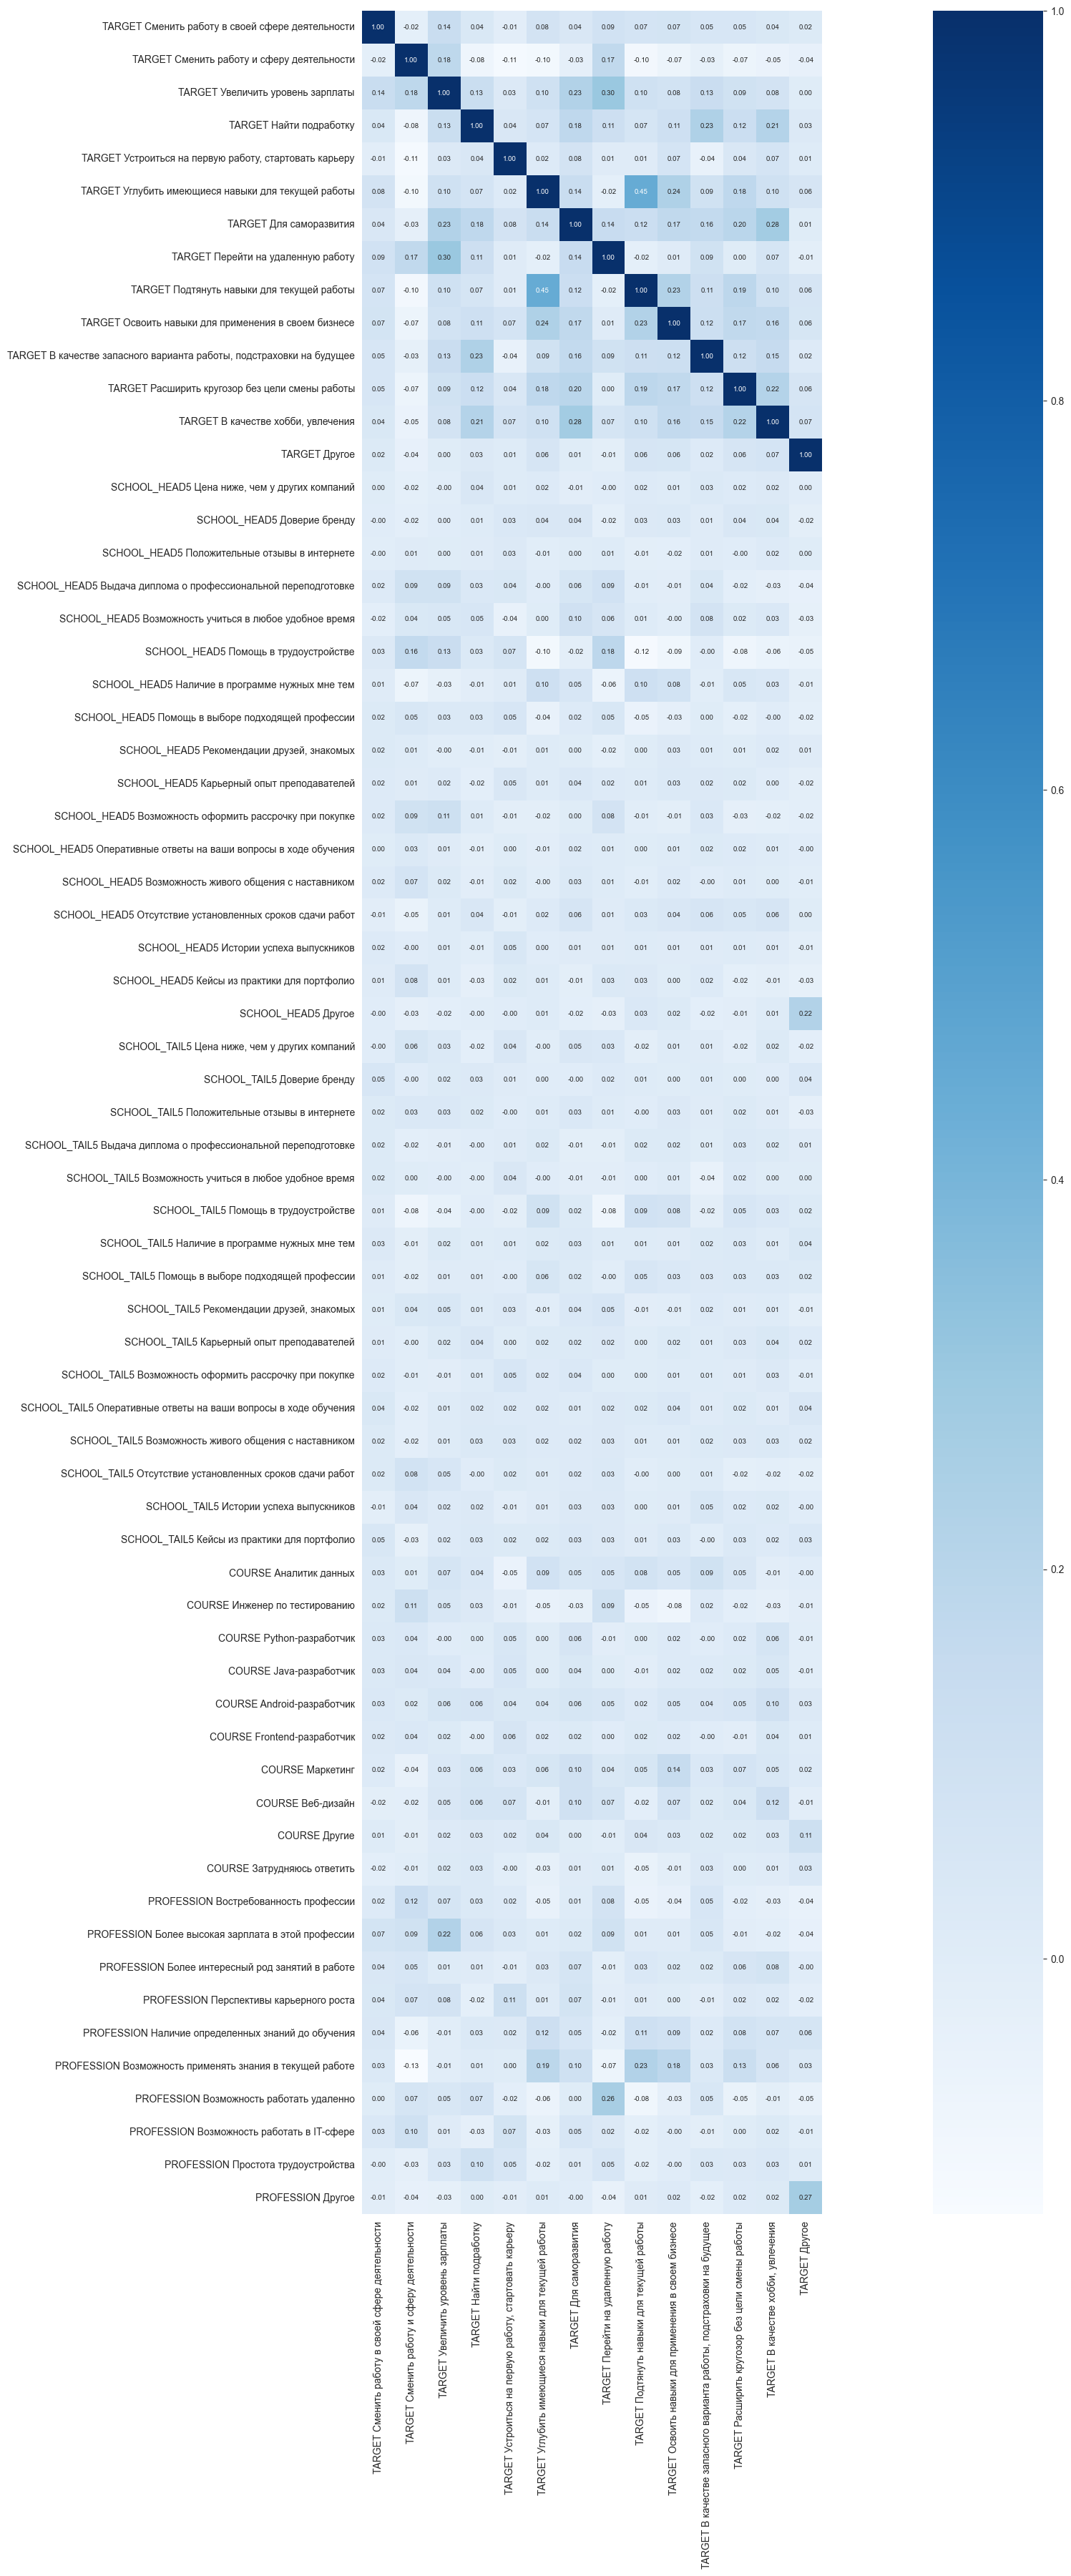

In [40]:
plt.figure(figsize=(40, 40))
sns.heatmap(correlation.filter(regex="TARGET"), cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size': 7}, cmap='Blues')

In [41]:
df

,RESPONSE_ID,TIME_STARTED,DATE_SUBMITTED,SALES_CHANNEL,__BLOGGER1,__BLOGGER2,TARGET Сменить работу в своей сфере деятельности,TARGET Сменить работу и сферу деятельности,TARGET Увеличить уровень зарплаты,TARGET Найти подработку,...,PROFESSION Другое,__PROFESSION Другое_4,OTHER_UNIVERSITIES,__OTHER_UNIVERSITY_NAMES,_IS_SKYPRO_BENEFITS,__SKYPRO_BENEFITS,SEX,_AGE,_EARNINGS,month_started
0,4,2022-02-16 16:05:35,2022-02-16 16:07:15,От блогера на YouTube (укажите имя блогера),NaN,NaN,0,0,0,0,...,0,NaN,0,NaN,Определенно есть,NaN,1,23.0,100 001 – 150 000 рублей,2
1,5,2022-02-16 16:18:37,2022-02-16 16:20:26,От коллег на работе,NaN,NaN,0,1,0,0,...,0,NaN,0,NaN,Скорее нет,NaN,1,23.0,50 001 – 70 000 рублей,2
2,7,2022-02-16 16:24:22,2022-02-16 16:29:50,"От знакомых, друзей",NaN,NaN,0,0,1,0,...,0,NaN,0,NaN,Скорее есть,NaN,1,23.0,30 001 – 40 000 рублей,2
3,10,2022-02-16 18:28:47,2022-02-16 18:31:38,Через поиск в Google / Яндекс / другой поисков...,NaN,NaN,0,0,0,0,...,0,NaN,0,NaN,NaN,NaN,0,31.0,70 001 – 100 000 рублей,2
4,11,2022-02-16 18:34:18,2022-02-16 18:39:56,От блогера на YouTube (укажите имя блогера),NaN,NaN,0,1,0,0,...,0,NaN,0,NaN,NaN,NaN,1,32.0,Предпочитаю не отвечать,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9754,12117,2022-11-08 17:33:09,2022-11-08 17:36:14,"Реклама в Facebook, Вконтакте",NaN,NaN,0,0,0,0,...,0,NaN,0,NaN,NaN,NaN,0,32.0,10 000 – 20 000 рублей,11
9755,12118,2022-11-08 18:43:53,2022-11-08 18:47:24,Другое,NaN,Vk,0,1,0,0,...,0,NaN,0,NaN,NaN,NaN,0,29.0,30 001 – 40 000 рублей,11
9756,12120,2022-11-09 04:55:35,2022-11-09 05:01:33,Пост в Telegram,NaN,NaN,0,1,0,1,...,0,NaN,0,NaN,NaN,NaN,0,21.0,40 001 – 50 000 рублей,11
9757,12122,2022-11-09 06:20:17,2022-11-09 06:25:04,"Комментарии, отзывы в соцсетях",NaN,NaN,0,0,0,1,...,0,NaN,0,NaN,NaN,NaN,0,43.0,70 001 – 100 000 рублей,11
